<a href="https://colab.research.google.com/github/Aman151295/Simple-Linear-Regression/blob/main/Delivery_model_using_sorting_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIMPLE LINEAR REGRESSION BY SCIKIT LEARN**



In [1]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
Delivery_data = pd.read_csv("/content/delivery_time (1).csv")
print('Delivery_data' , Delivery_data)

Delivery_data     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5


In [3]:
Delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


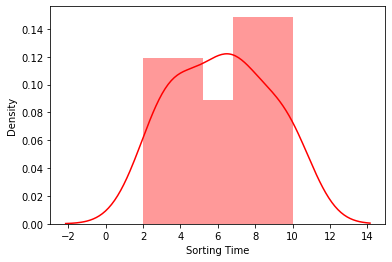

In [4]:
# Data Visualization plot for Sorting time


Sorting_plot = sns.distplot(Delivery_data['Sorting Time'], kde = True, color ='Red', bins = 5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


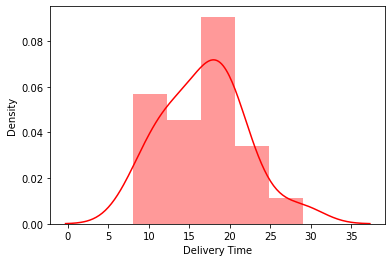

In [5]:
# Data Visualization plot for Delivery time

Sorting_plot = sns.distplot(Delivery_data['Delivery Time'], kde = True, color ='Red', bins = 5)

In [6]:
#Correlation Analysis


Delivery_data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


**The inputs (regressors, 𝑥) and output (predictor, 𝑦) should be arrays for 
Simple Linear Regression With scikit-learn** **bold text**

[[10]
 [ 4]
 [ 6]
 [ 9]
 [10]
 [ 6]
 [ 7]
 [ 3]
 [10]
 [ 9]
 [ 8]
 [ 4]
 [ 7]
 [ 3]
 [ 3]
 [ 4]
 [ 6]
 [ 7]
 [ 2]
 [ 7]
 [ 5]]
[[21.  ]
 [13.5 ]
 [19.75]
 [24.  ]
 [29.  ]
 [15.35]
 [19.  ]
 [ 9.5 ]
 [17.9 ]
 [18.75]
 [19.83]
 [10.75]
 [16.68]
 [11.5 ]
 [12.03]
 [14.88]
 [13.75]
 [18.11]
 [ 8.  ]
 [17.83]
 [21.5 ]]


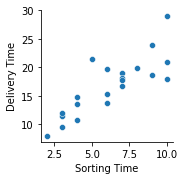

In [10]:
Sorting_time_X = np.array(Delivery_data.iloc[0:21,1]).reshape(-1,1)

print(Sorting_time_X)

#

Delivery_time = np.array(Delivery_data.iloc[:,0])
Delivery_time_Y = Delivery_time.reshape(-1,1)
print(Delivery_time_Y)

#

sns.pairplot(Delivery_data, x_vars='Sorting Time' , y_vars = 'Delivery Time' , kind= 'scatter')


In [11]:
## Splitting the dataset into training and test set. 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X_train, X_test, Y_train, Y_test = train_test_split(Sorting_time_X, Delivery_time_Y, test_size = 0.2, random_state = 0)

# fit a model

lm = LinearRegression()
Fitting_data = lm.fit(X_train, Y_train)
print('Fitting_data : ', Fitting_data)

Fitting_data :  LinearRegression()


#  Obtain the coefficient of determination (𝑅²) with .score() called on model

In [12]:
lm.score(X_train, Y_train)

0.803819534436421

# **The attributes of mode/lm are .intercept_, which represents the coefficient, 𝑏₀ and .coef_, which represents 𝑏₁:**

In [13]:
print('intercept:', lm.intercept_)
print('slope:', lm.coef_)

intercept: [5.01597826]
slope: [[1.89619565]]


# **.predict(), you pass the regressor as the argument and get the corresponding predicted response.**

Predicted response:
[[23.97793478]
 [10.70456522]
 [14.49695652]
 [12.60076087]
 [12.60076087]]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


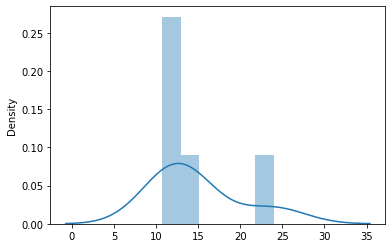

In [14]:
y_pred = lm.predict(X_test)
print('Predicted response:', y_pred, sep='\n')

# Plot a model for True Values & predicted Values, to check how much accurate our model is

sns.distplot(y_pred, kde=True)

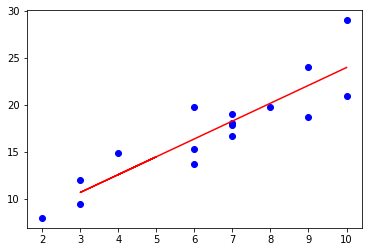

In [15]:
#Visualizing the Test set results  
plt.scatter(X_train, Y_train, color="blue")   
plt.plot(X_test, y_pred, color="red")    